In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [54]:
X = np.genfromtxt("lung_cancer_data.csv", delimiter=",")
y = np.genfromtxt("lung_cancer_label.csv")

# Part 1 and Part 2

In [55]:
# Centering X
X = X - np.mean(X, axis=0)
# Scaling X
X = X / np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(400, 5)
(50, 5)
(50, 5)


In [56]:
# function for gradient descent
def gradient_descent(X, y, learning_rate=0.1, iters=1000):
    m, n = X.shape
    w = np.zeros(n)
    errors = []

    for _ in range(iters):
        y_pred = X.dot(w)

        errors.append(mean_squared_error(y, y_pred))

        gradient = X.T.dot(y_pred - y) / m
        w -= learning_rate * gradient

    plt.plot([i for i in range(iters)], errors)
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.show()

    return w, errors



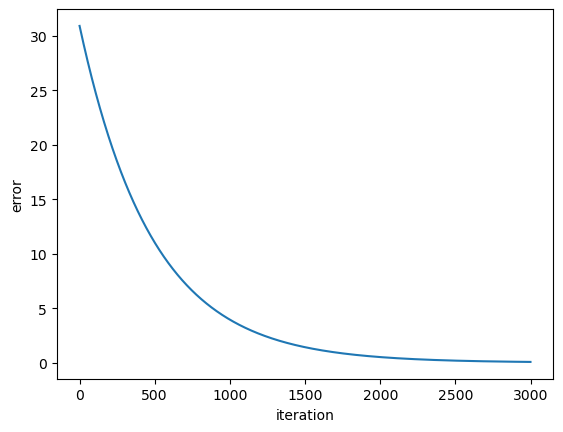

weights: [ 2.85490538  0.94883755  0.01168084  1.9522681   3.80427403 -0.02016519]


In [57]:
X_train_linear = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) 

w_linear, errors = gradient_descent(X_train_linear, y_train, learning_rate=0.001, iters=3000)

print(f'weights: {w_linear}')

In [58]:
# printing mse for training, testing and validation
X_test_linear = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
X_val_linear = np.hstack((X_val, np.ones((X_val.shape[0], 1))))

print(f'training mse: {mean_squared_error(y_train, X_train_linear.dot(w_linear))}')
print(f'testing mse: {mean_squared_error(y_test, X_test_linear.dot(w_linear))}')
print(f'validation mse: {mean_squared_error(y_val, X_val_linear.dot(w_linear))}')

training mse: 0.06978682285512859
testing mse: 0.06484740100168873
validation mse: 0.05830028492016209


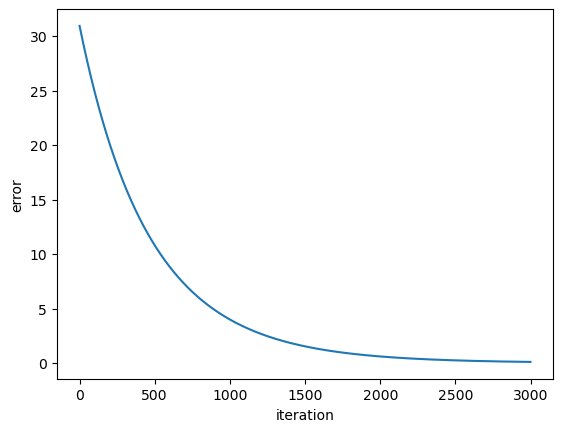

weights: [ 4.94890550e-03  2.85073396e+00  8.99309955e-01 -1.14786139e-02
  1.91566614e+00  3.77070837e+00 -9.49745304e-03 -8.95779590e-02
 -2.65696574e-02 -3.48307162e-02 -1.88189326e-02 -2.91705241e-02
 -2.16415362e-02  3.06611760e-02  4.73247837e-02 -3.55575666e-02
  4.78080866e-02  6.08734577e-02  5.11299398e-02  3.72787014e-03
  4.44802898e-03]


In [59]:
# for polynomial
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_val_poly = poly.fit_transform(X_val)

w_poly, errors = gradient_descent(X_train_poly, y_train, learning_rate=0.001, iters=3000)

print(f'weights: {w_poly}')

In [60]:
# printing mse for training, testing and validation
print(f'training mse: {mean_squared_error(y_train, X_train_poly.dot(w_poly))}')
print(f'testing mse: {mean_squared_error(y_test, X_test_poly.dot(w_poly))}')
print(f'validation mse: {mean_squared_error(y_val, X_val_poly.dot(w_poly))}')

training mse: 0.10204191706088375
testing mse: 0.12840588207113057
validation mse: 0.07971604802823669


# Which model would I pick?
Based on the results, I would pick the linear regression model, as the MSEs are lower compared to the quadratic model.

# Getting the first 20 samples

In [61]:
X_20 = X_train_linear[:20, :]
y_20 = y_train[:20]

table = [[X_20[i].dot(w_linear), y_20[i]] for i in range(20)]
print(tabulate(table, headers=["Predicted", "Actual"]))

  Predicted    Actual
-----------  --------
   7.5225        7.73
  -2.65294      -2.75
  -4.66029      -4.85
   6.94203       7.33
  -3.06224      -3.16
  -5.8539       -6.03
  -4.21428      -4.36
  -3.43395      -3.47
  -3.27766      -3.33
  -9.90719     -10.39
   2.77087       3.01
   3.12133       3.34
   3.24503       3.49
   0.959662      0.99
 -11.0037      -11.48
  -4.80297      -5.09
   5.13936       5.53
  -3.07647      -3.22
   1.09711       1.11
  -0.712268     -0.73
